# 実践その壱
自分で用意したデータを使って画像分類モデルをトレーニングし、結果を評価する。

## 条件
- 分類してみたい画像を最低3カテゴリー用意する。レッスン2で使用した「グリズリー」「ブラックベア」「テディベア」はNG。各カテゴリー50個以上データサンプルがあること。
- fastaiのライブラリを使用すること


## ヒント
- レッスン2の動画（ https://www.youtube.com/watch?v=MIaAUIc87r4&list=PLPth6MvJU5iFbsl1eNOLV1jJUv2JMjdgg ） を参考にAzureのSearch APIを使ってデータをダウンロードするもよし、こちらの動画（ https://www.youtube.com/watch?v=YZ0czV4N9d0&list=PLPth6MvJU5iEG4Ql3RbKdj7fWWu4JSJmH ）Googleで検索した画像をJavascriptで落とすのも良し。一つ一つ手動でダウロードして一つずつアップロードするも良し。方法は自由です。

### その他
fastaiのバージョンは2.xを使用してください。Google Colabにデフォルトで入っているバージョンは1.0のため、まず最初にfastaiをアップグレードする必要があります。

```
! pip install fastai --upgrade
```

上記実行後、ランタイムを再起動します。GPUを使う設定も忘れずに。

In [2]:
# !pip install fastai --upgrade

In [1]:
# fastaiのバージョンをチェックします。
# 2.x ならokです。

import fastai
fastai.__version__

'2.4'

In [2]:
# ここにStudent IDを記載しておいてください。
Student_ID = ""


In [5]:
# import library
from fastai.vision.all import *
import requests 

In [6]:
import warnings
warnings.filterwarnings('ignore')

## 1. 画像を準備する

まず、*data*という名前のディレクトリを作成、更にその中にカテゴリーに対応したディレクトリを作成します。
その後カテゴリーに対応したディレクトリに画像をデータをそれぞれ入れていきます。

以下に例を示します。
```
./data/black/1.jpg
./data/grizzly/4.jpg
./data/teddy/2.jpg
```

例えば```./data/black/```の中にブラックベアの画像が入ることになります。
但し今回は自分で考えたカテゴリーを使うのでblack等はそれに合った名前を使ってください。

In [8]:
# 下記を実行することで、クマのサンプルでテストできます。
# ですが、このアサインメントをパスするには"クマ"以外の自分のデータを自分のスキルでなんとかして用意する必要があります。

# ! wget http://shabelab.com/datasets/bears.tar.gz
# ! tar xvzf bears.tar.gz

--2021-07-07 03:29:27--  http://shabelab.com/datasets/bears.tar.gz
Resolving shabelab.com (shabelab.com)... 18.178.121.19
Connecting to shabelab.com (shabelab.com)|18.178.121.19|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://shabelab.com/datasets/bears.tar.gz [following]
--2021-07-07 03:29:27--  https://shabelab.com/datasets/bears.tar.gz
Connecting to shabelab.com (shabelab.com)|18.178.121.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142392895 (136M) [application/gzip]
Saving to: ‘bears.tar.gz’

bears.tar.gz        100%[===================>] 135.80M  12.7MB/s    in 11s     

2021-07-07 03:29:39 (12.1 MB/s) - ‘bears.tar.gz’ saved [142392895/142392895]



data/
data/black/
data/black/39.png
data/black/68.png
data/black/132.png
data/black/4.png
data/black/87.png
data/black/91.png
data/black/10.png
data/black/120.png
data/black/109.png
data/black/116.png
data/black/94.png
data/black/58.png
data/black/35.png
data/black/61.png
data/black/119.png
data/black/124.png
data/black/121.png
data/black/97.png
data/black/149.png
data/black/22.png
data/black/74.png
data/black/11.png
data/black/45.png
data/black/1.png
data/black/88.png
data/black/71.png
data/black/40.png
data/black/20.png
data/black/123.png
data/black/46.png
data/black/6.png
data/black/15.png
data/black/56.png
data/black/47.png
data/black/66.png
data/black/63.png
data/black/43.png
data/black/26.png
data/black/115.png
data/black/57.png
data/black/92.png
data/black/144.png
data/black/84.png
data/black/140.png
data/black/64.png
data/black/77.png
data/black/138.png
data/black/89.png
data/black/112.png
data/black/127.png
data/black/101.png
data/black/130.png
data/black/131.png
data/black/34

## 2. データセットを設定し、学習を行う
以下は各セルを順番に実行していくだけでokです。

*学習のヒント:*
将来類似の問題に出くわした際は、似た様な問題を暑かったnotebooksやgithubのプロジェクトを探し、それを変更して解決できないか試してみましょう。データを変えるだけで解決できることは少ないですが、そこが出発点として使える事は多いです。

In [10]:
# datablock
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [11]:
# prepare dataloaders
dls = bears.dataloaders("./data")

In [12]:
# train 
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.775502,0.329285,0.098039,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.578813,0.236213,0.078431,00:10
1,0.408121,0.242764,0.078431,00:09
2,0.303466,0.328087,0.098039,00:10
3,0.232870,0.353630,0.098039,00:10


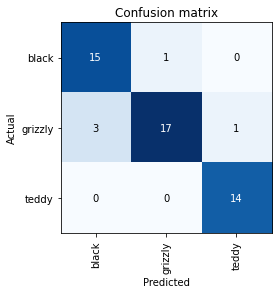

In [13]:
# evaluate training
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [14]:
# save 
learn.export()

## 3. テスト
学習で使わなかった画像を一つ用意しアップロードします。  
その後、保存したモデルをロードし、どんな推論結果が出るかテストしてみましょう。

ここではtest.jpgという名前で保存しています。

In [16]:
# 画像を一つアップロードする。
# 以下はクマの例です。アサインメントでは自分のデータに合うサンプルを用意する必要があります。

# ! wget https://shabelab.com/mp3/1200px-2010-kodiak-bear-1.jpg -O test.jpg


In [17]:
# load model
learn_inf = load_learner('export.pkl')

In [18]:
# upload image 
test_image = "test.jpg"

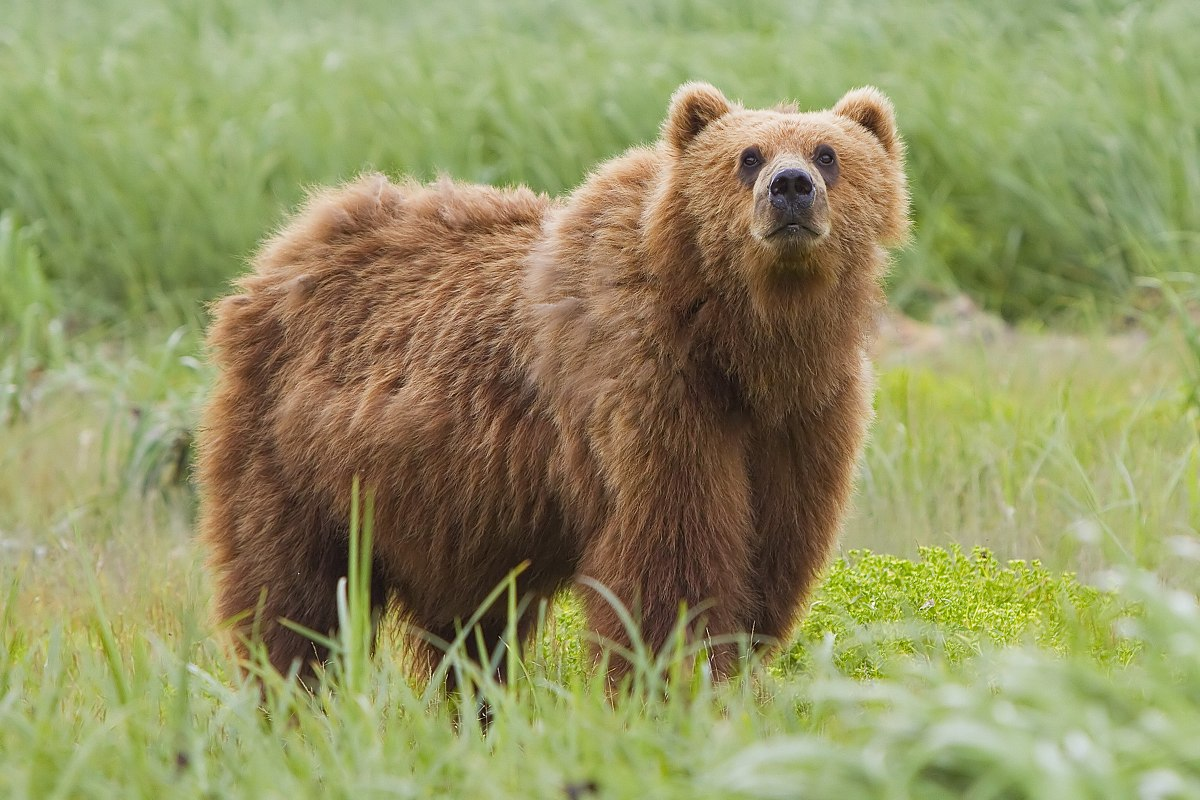

In [19]:
from IPython.display import Image
Image(filename=test_image) 

In [20]:
# test model
learn_inf.predict(test_image)

('grizzly', tensor(1), tensor([2.3824e-04, 9.9746e-01, 2.2992e-03]))